In [15]:
import cartopy.crs as ccrs
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import xarray as xr
import urllib.request
import os

# Get data from NOAA
url = 'https://downloads.psl.noaa.gov/Datasets/noaa.ersst.v5/sst.mnmean.nc'
filename = 'data/' + url.split('/')[-1] # Translate url into a filename

if os.path.exists(filename):
    print(f'Found {filename}')
else:
    # Try to download from NOAA
    try:
        urllib.request.urlretrieve(url, filename)
        print(f'File downloaded to {filename}')
    except Exception as e:
        print(f'Error downloading file: {e}')


Found data/sst.mnmean.nc


In [2]:
ersst_data = (
    xr.open_dataset("data/sst.mnmean.nc")
    .sst.sortby("lat")
    .sel(lat=slice(-40, 40), lon=slice(120, 290))
)
ersst_data

<xarray.DataArray 'sst' (time: 2055, lat: 41, lon: 86)> Size: 29MB
[7245930 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 164B -40.0 -38.0 -36.0 -34.0 ... 34.0 36.0 38.0 40.0
  * lon      (lon) float32 344B 120.0 122.0 124.0 126.0 ... 286.0 288.0 290.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2025-03-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [3]:
clim_period = slice("1991", "2020")
ersst_clim = ersst_data.sel(time=clim_period).groupby("time.month").mean("time")
ersst_anom = ersst_data.groupby("time.month") - ersst_clim

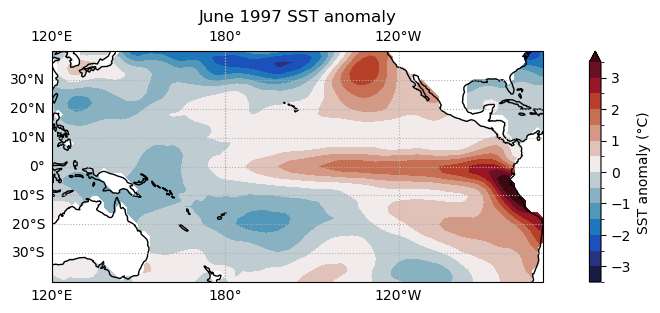

In [5]:
fig, ax = plt.subplots(
    figsize=(12, 3), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180))
)
ersst_anom.sel(time="1997-06").squeeze().plot.contourf(
    ax=ax,
    cmap=cmo.balance,
    levels=[-3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5],
    transform=ccrs.PlateCarree(),
    cbar_kwargs=dict(label="SST anomaly (°C)"),
)
ax.coastlines()
# ax.set_extent([120, 290, -40, 40], crs=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, linestyle=":")
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_title("June 1997 SST anomaly")
fig.savefig("images/ersst_anom.png", bbox_inches="tight", dpi=300)

In [6]:
ersst_anom = ersst_anom.drop("month")
ersst_anom.name = "ssta"
ersst_anom

/tmp/ipykernel_18084/152856574.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ersst_anom = ersst_anom.drop("month")


<xarray.DataArray 'ssta' (time: 2055, lat: 41, lon: 86)> Size: 29MB
array([[[-0.84033966, -0.6383381 , -0.44122028, ..., -1.056593  ,
                 nan,         nan],
        [-1.1388769 , -0.8984375 , -0.6104984 , ..., -1.1311932 ,
                 nan,         nan],
        [-1.450161  , -1.2052517 , -0.8193588 , ..., -1.0845127 ,
                 nan,         nan],
        ...,
        [        nan, -0.04257154, -1.0953655 , ...,  1.0166531 ,
          0.6275406 ,  0.37892342],
        [ 1.755795  ,  0.87201786, -0.3320918 , ...,  0.7862549 ,
          0.44330692,  0.21854591],
        [ 2.1786861 ,  1.3697758 ,  0.0896554 , ...,  0.43834448,
          0.03181553, -0.2446928 ]],

       [[-1.2137566 , -1.049015  , -0.9198904 , ..., -1.1637831 ,
                 nan,         nan],
        [-1.3218689 , -1.113409  , -0.92447853, ..., -1.2949009 ,
                 nan,         nan],
        [-1.408701  , -1.1967564 , -0.9477997 , ..., -1.3191166 ,
                 nan,         nan],
...
        [        nan,  0.73945665,  0.6316829 , ..., -0.47609425,
         -0.3282318 , -0.12079239],
        [ 0.82754445,  0.76593375,  0.6792836 , ..., -0.7462959 ,
         -0.6401119 , -0.4321909 ],
        [ 0.86774695,  0.8088881 ,  0.7178502 , ..., -0.8241582 ,
         -0.761508  , -0.6525793 ]],

       [[ 0.54204464,  0.57256126,  0.5639982 , ...,  0.28947544,
                 nan,         nan],
        [ 0.590889  ,  0.6015701 ,  0.5787926 , ...,  0.32032967,
                 nan,         nan],
        [ 0.624197  ,  0.61104965,  0.5675945 , ...,  0.2996006 ,
                 nan,         nan],
        ...,
        [        nan,  0.28505373,  0.23413944, ..., -0.07979488,
         -0.05720711, -0.06540489],
        [ 0.49051666,  0.46675253,  0.44392395, ..., -0.13869953,
         -0.10363293, -0.08069706],
        [ 0.52953005,  0.53878736,  0.54598594, ..., -0.12417412,
         -0.07702112, -0.05340385]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 164B -40.0 -38.0 -36.0 -34.0 ... 34.0 36.0 38.0 40.0
  * lon      (lon) float32 344B 120.0 122.0 124.0 126.0 ... 286.0 288.0 290.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2025-03-01

In [7]:
ersst_anom.isel(time=slice(1, -4)).to_netcdf("data/ersst_pacific_anom.nc")

In [8]:
en34 = ersst_anom.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(("lat", "lon"))
oni = en34.rolling(time=3, center=True).mean().dropna("time")

In [9]:
# 0 for neutral, 1 for nino, 2 for nina

# nino when oni is above 0.5 for 5 consecutive months
nino = ((oni > 0.5).astype(int).rolling(time=5).sum() == 5).astype(int)
nino = nino.where(nino).bfill("time", limit=4).fillna(0)

# nina when oni is below -0.5 for 5 consecutive months
nina = ((oni < -0.5).astype(int).rolling(time=5).sum() == 5).astype(int)
nina = nina.where(nina).bfill("time", limit=4).fillna(0)
nina = nina * 2

enso_class = nino + nina
enso_class.name = "enso_class"
enso_class

<xarray.DataArray 'enso_class' (time: 2053)> Size: 16kB
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 16kB 1854-02-01 1854-03-01 ... 2025-02-01

In [10]:
enso_class.to_netcdf("data/enso_class.nc")

In [11]:
class_labels = xr.open_dataarray("data/enso_class.nc")
labels = class_labels.rolling(time=3).construct("lead").shift(time=-3).dropna("time")
labels["lead"] = [1, 2, 3]
labels

<xarray.DataArray 'enso_class' (time: 2050, lead: 3)> Size: 49kB
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 2.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * time     (time) datetime64[ns] 16kB 1854-02-01 1854-03-01 ... 2024-11-01
  * lead     (lead) int64 24B 1 2 3

In [12]:
labels_df = labels.to_pandas().reset_index()
labels_df.columns = ["time", "lead_1", "lead_2", "lead_3"]
labels_df.to_csv("data/labels.csv", index=False)

In [13]:
ersst_anom.isel(time=-1, drop=True).to_netcdf("data/ersst_anom_dec2023.nc")